<a href="https://colab.research.google.com/github/thumb-chuu/BigData-Internship_statistics/blob/main/%EC%97%84%EC%A7%80%EC%88%98_%EC%8B%A4%EC%8A%B5(3)%EC%97%B0%EC%86%8D%ED%99%95%EB%A5%A0%EB%B6%84%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ◆ 연속확률분포 실습
### Scipy 패키지
### - 사이파이(SciPy)는 수치 해석 기능을 제공하는 파이썬 패키지
### - 확률분포 분석을 위한 기능 제공

### 3. 연속확률분포
### 1) 정규분포
### - 평균을 중심으로 좌우대칭이고 종 모양을 갖는 확률분포(=가우스분포, Gaussian distribution)
### stats.norm(loc='기대값', scale='표준편차')

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

E: dpkg was interrupted, you must manually run 'sudo dpkg --configure -a' to correct the problem. 
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
# 패키지 임포트
import os
import warnings
# FutureWarning 제거
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd                 # pandas package
import numpy as np                  # numpy package
from scipy import stats             # Scipy Package

# 시각화 패키지
import matplotlib.pyplot as plt     # matplotlib 시각화 패키지
import seaborn as sns
%matplotlib inline

# os에 따른 Font 깨짐 제거를 위해 Font 지정 
import os 
if os.name == 'nt' :
    font_family = "NanumBarunGothic" # Windows OS 
else :
    font_family = "NanumBarunGothic" # MAC OS
    
# - 값이 깨지는 문제 해결을 위해 파라미터 값 설정 
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})

In [3]:
## 기대값이 70이고 표준편차가 10인 정규분포 생성
norm = stats.norm(loc=70, scale=10)

In [4]:
## 구간 내에 숫자를 균일한 간격으로 생성(X축)
# -10 ~ 150 까지 2000개 생성
s_x = np.linspace(-10, 150, 2000)

## 확률밀도함수
s_pdf = norm.pdf(s_x)

In [5]:
## 확률 밀도함수 계산
# mu = 70
# sigma = 10
# s_pdf_cal = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(s_x-mu)**2 / (2 * sigma**2))

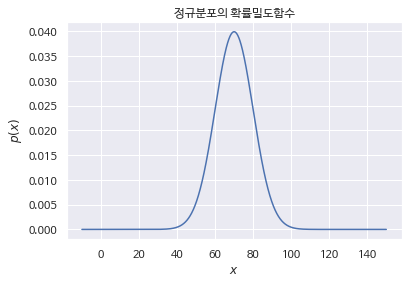

In [6]:
# 정규분포 시각화
plt.plot(s_x, s_pdf)
plt.title("정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

In [7]:
## 누적분포함수
s_cdf = norm.cdf(s_x)

## 누적분포함수 계산
# from scipy.special import erf
# s_cdf_cal = 0.5 * (1 + erf((s_x-mu) / np.sqrt(2 * sigma**2)))

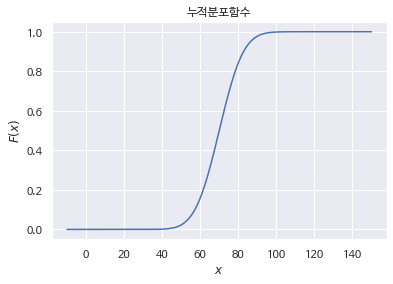

In [8]:
## 누적분포함수 시각화
plt.plot(s_x, s_cdf)
plt.title("누적분포함수")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.show()

### 2) 표준정규분포
### - 표준화 확률변수 Z에 의해 변환과정을 거쳐 평균이 0이고, 표준편차가 1로 정리된 정규분포
### stats.norm(loc=0, scale=1)

In [9]:
## 기대값이 0이고 표준편차가 11인 정규분포
stan_norm = stats.norm(loc=0, scale=1)
# 구간 내에 숫자를 균일한 간격으로 생성(X축)
# -10 ~ 150 까지 2000개 생성
sn_x = np.linspace(-5, 5, 1000)

# 확률밀도함수
sn_pdf = stan_norm.pdf(sn_x)

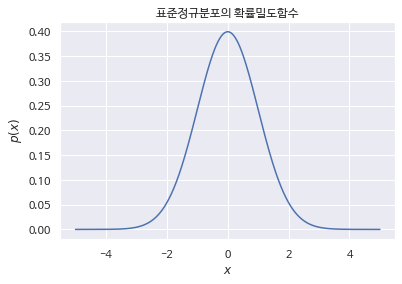

In [10]:
# 정규분포 시각화
plt.plot(sn_x, sn_pdf)
plt.title("표준정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

### 3) 표준화
### - 정규분포를 평균이 0이고, 표준편차가 1인 표준정규분포로 정리하는 과정
### stats.norm(loc=0, scale=1)

In [11]:
## 랜덤 데이터 생성
n_data = np.random.randint(1, 100, size = 1000)
n_data = np.sort(n_data)

In [12]:
n_data.shape

(1000,)

In [13]:
## n-data의 평균과 표준편차 계산
n_mean = np.mean(n_data)
print('mean:', np.mean(n_data))

n_std = np.std(n_data)
print('standard deviation:', np.std(n_data))

mean: 50.316
standard deviation: 28.291626747149056


In [14]:
## 확률밀도함수
norm_n_data = stats.norm(loc = n_mean, scale = n_std)

n_pdf = norm_n_data.pdf(n_data)

In [15]:
n_data.shape

(1000,)

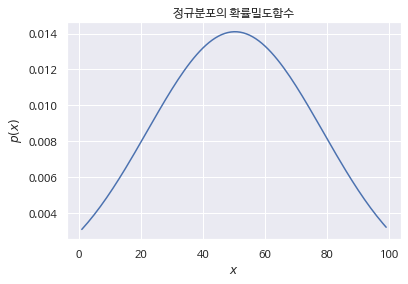

In [16]:
## 정규분포 시각화
plt.plot(n_data, n_pdf)
plt.title("정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

In [17]:
## 표준화 수행
z_data = list(n_data)
z_data_list = []

for i in z_data:
    z = (i - n_mean) / n_std
    z_data_list.append(z)

In [18]:
## 표준정규분포 확률밀도함수
norm_z_data = stats.norm(loc = 0, scale = 1)
z_pdf = norm_z_data.pdf(z_data_list)

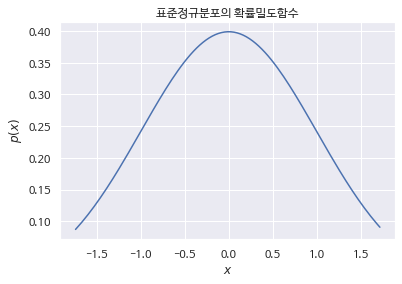

In [19]:
# 표준정규분포 시각화
plt.plot(z_data_list, z_pdf)
plt.title("표준정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

### 4) 카이제곱분포
### - 모든 데이터가 흩어진 정도, 즉 치우침을 나타내는 분산의 특징을 이용해 한 집단의 (표본)분산을 추론하는 분포
### - 범주형 변수인 명목척도나 서열척도 자료의 독립성 검정, 적합성 검정, 동질성 검정에 주로 활용
### chisquare() : 카이제곱 검정의 검정 통계량과 유의확률을 계산, 적합도 검정 / chi2() : 카이제곱분포

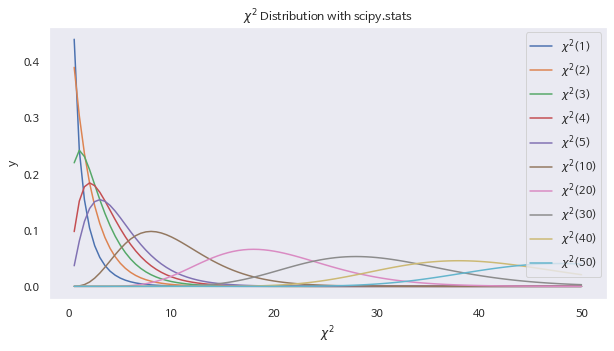

In [20]:
## 카이제곱분포 표현
from scipy.stats import chi2

## 라인스페이스 x축  설정
Chi_X = np.linspace(0.5, 50, 100)

# 자유도에 따른 카이제곱분포 시각화
plt.figure(figsize=(10, 5))                             # 플롯 사이즈 지정
for dof in [1,2,3,4,5,10,20,30,40,50] :
    plt.plot(Chi_X, stats.chi2(dof).pdf(Chi_X), label=r'$\chi^2$(' + str(dof) + ')')

plt.xlabel(r'$\chi^2$')                                 # x축 레이블 지정
plt.ylabel("y")                                         # y축 레이블 지정
plt.grid()                                              # 플롯에 격자 보이기
plt.title(r'$\chi^2$ Distribution with scipy.stats')
plt.legend()                                            # 범례 표시
plt.show()                                              # 플롯

In [21]:
### 카이제곱분포를 이용한 적합성 검정
## 한 개의 '판매지역' 명목 변수에 값 확인 결과 서울, 인천, 대구 지역에서 판매
## 교차분석표 생성(자유도 2)

# 관찰도수
x_o = [324, 78, 261]
# 기대도수
x_e = [371, 80, 212]

# 지역별 A제품의 판매수
x_crosstab = pd.DataFrame([x_o, x_e], columns = ['서울', '인천', '대구'], index = ['관찰도수', '기대도수'])

In [22]:
x_crosstab

,서울,인천,대구
관찰도수,324,78,261
기대도수,371,80,212


In [23]:
## 카이제곱 통계량 계산
from scipy.stats import chisquare

result = chisquare(x_o, f_exp = x_e)
result

# p-value가 0.0001725로 유의수준 0.05보다 작으므로 귀무가설을 기각하고, 대립가설을 지지한다.
# 즉, 관찰빈도와 기대빈도는 다르다.

Power_divergenceResult(statistic=17.329649595687332, pvalue=0.00017254977751013492)

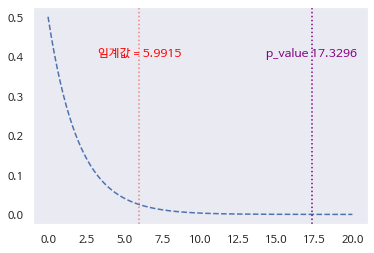

In [29]:
## 위 사례의 카이제곱분포 시각화
from scipy.stats import chi2

dof = 2                             # 자유도
x_chi_l = np.linspace(0, 20, 201)
pdf_chi = chi2(dof).pdf(x_chi_l)

# 유의수준 : 5%
x95_c = chi2(dof).ppf(.95)
plt.plot(x_chi_l, pdf_chi, 'b--')

# 95%의 임계값 표시
plt.axvline(x=x95_c, color='lightcoral', linestyle=':')
plt.text(x95_c, .4, '임계값 = ' + str(round(x95_c, 4)), horizontalalignment='center', color='red')

# 위에서 구한 카이분포 통계값 = result[0]
plt.axvline(x=result[0], color='purple', linestyle=':')
plt.text(result[0], .4, 'p_value ' + str(round(result[0], 4)), horizontalalignment='center', color='purple')
plt.grid()
plt.show()